# Resonances 2 - Coupled Channel Resonances
---

In [1]:
# Import libraries
import sys

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib import color_sequences
import matplotlib.patches as mpatches

from scipy.ndimage import maximum_filter

from IPython.display import display, Math

import seaborn as sns

sys.path.append("utils")

In [6]:
fig_dir = "/home/n_inde01/sciebo/Doktor/phinx/Images/tutorial_notebooks/resonances_2_coupled_channel/"
save_fig = False

sns.set_theme(context="notebook", style="whitegrid", palette="deep")

In [7]:
try:
  import google.colab
  using_colab = True
  save_fig = False
except ImportError:
  using_colab = False

if using_colab:
  !rm -r utils
  !mkdir utils
  !wget https://raw.githubusercontent.com/n-idw/tutorials/refs/heads/main/utils/dynamics.py -O utils/dynamics.py

# S-Wave Dynamic

General Constants

In [8]:
m_eta = 0.547
m_etap = 0.957
m_pic = 0.13957
m_pi0 = 0.13498
m_Kc = 0.49367
m_K0 = 0.497614

## T-Matrix

$$ T = (I + K \Sigma)^{-1}K $$
$$ K_{i j}(s)=\sum_\alpha B^l\left(q_i, q_{\alpha_i}\right) \cdot\left(\frac{g_{\alpha_i} g_{\alpha_j}}{m_\alpha^2-s}+\tilde{c}_{i j}\right) \cdot B^l\left(q_j, q_{\alpha_j}\right) $$

In [9]:
from utils.dynamics import T_matrix, cm_dudek

Meta Data

In [10]:
name = "test"
R = 2
C = 1
# C = 5
B_K_mat = -1
B_P_vec = -1
projection = [0, 0]

Parameter Values

In [ ]:
s0 = 0.0091125
s_norm = 1.0
# mR = np.array(
#     [
#         0.9,
#         1.37,
#         1.5,
#         1.71,
#     ]
# )
mR = np.array([0.5, 0.5])
# mR = np.array(
#     [
#         0.5488194129157109,
#         0.8000000186445533,
#         1.23849221143044,
#         1.475385317315992,
#         1.799999999997333,
#     ]
# )
# mR = np.array([0.51461, 0.90630, 1.23089, 1.46104, 1.69611])
# gR = np.array(
#     [
#         [
#             0.2497895944235186,
#             # 0,
#             0.7567248723752383,
#             -0.6940935624800852,
#             0.08171370883014428,
#             0.4204521911512075,
#         ],
#         [
#             # 0.0,
#             0.8437789543561144,
#             0.1210019447729669,
#             -0.9980267703947172,
#             0.4653658484772716,
#             -0.3237763654578288,
#         ],
#     ]
# )
# gR = np.array(
#     [
#         [
#             2,
#             1,
#             1,
#             1,
#             1,
#         ],
#         [
#             4,
#             1,
#             1,
#             1,
#             1,
#         ],
#         [
#             1,
#             1,
#             1,
#             1,
#             1,
#         ],
#     ]
# )
gR = np.array([[0.5, 1.0]])
# gR = np.array(
#     [
#         [0.74987, 0.06401, -0.23417, 0.01270, -0.14242],
#         [-0.01257, 0.00204, -0.01032, 0.26700, 0.22780],
#         [0.27536, 0.77413, 0.72283, 0.09214, 0.15981],
#         [-0.15102, 0.50999, 0.11934, 0.02742, 0.16272],
#         [0.36103, 0.13112, 0.36792, -0.04025, -0.17397],
#     ]
# )

# mC = np.array([[m_pic, m_pic], [m_Kc, m_Kc], [m_eta, m_etap]])
mC = np.array([[m_pic, m_pic]])
# mC = np.array(
#     [
#         [m_pi0, m_pi0],
#         [2 * m_pi0, 2 * m_pi0],
#         [m_Kc, m_K0],
#         [m_eta, m_eta],
#         [m_eta, m_etap],
#     ]
# )

# b_K_mat = np.array(
#     [
#         [[0.08325437351649369], [0.1252650174658121]],
#         [[0.1252650174658121], [0.2422503718162533]],
#     ]
# )
# b_K_mat = np.array(
#     [
#         [[0.03728], [0], [-0.01398], [-0.02203], [0.01397]],
#         [[0], [0], [0], [0], [0]],
#         [[-0.01398], [0], [0.02349], [0.03101], [-0.04003]],
#         [[-0.02203], [0], [0.03101], [-0.13769], [-0.06722]],
#         [[0.01397], [0], [-0.04003], [-0.06722], [-0.28401]],
#     ]
# )
b_K_mat = np.array(
    [
        [[1], [1]],
        [[1], [1]],
    ]
)

Real Energies

In [71]:
s = np.linspace((2 * m_pic) ** 2, 2.6**2, 1000) + 0.0j
amp = np.zeros(len(s), dtype=complex)
phsp = np.zeros(len(s), dtype=complex)
for i, s_val in enumerate(s):
    amp[i] = T_matrix(s_val, mR, mC, gR, b_K_mat, R, C, B_K_mat, s0, s_norm)[
        projection[0], projection[1]
    ]
    if -np.imag(cm_dudek(s_val, mC[0, 0], mC[0, 1], 1)) < 1e-15:
        phsp[i] = 0.0 + 0.0j
    else:
        phsp[i] = -np.imag(
            cm_dudek(s_val, mC[projection[0], 0], mC[projection[0], 1], 1)
        )

mag = abs(amp)
int = abs(amp * phsp) ** 2
phase = np.angle(amp)

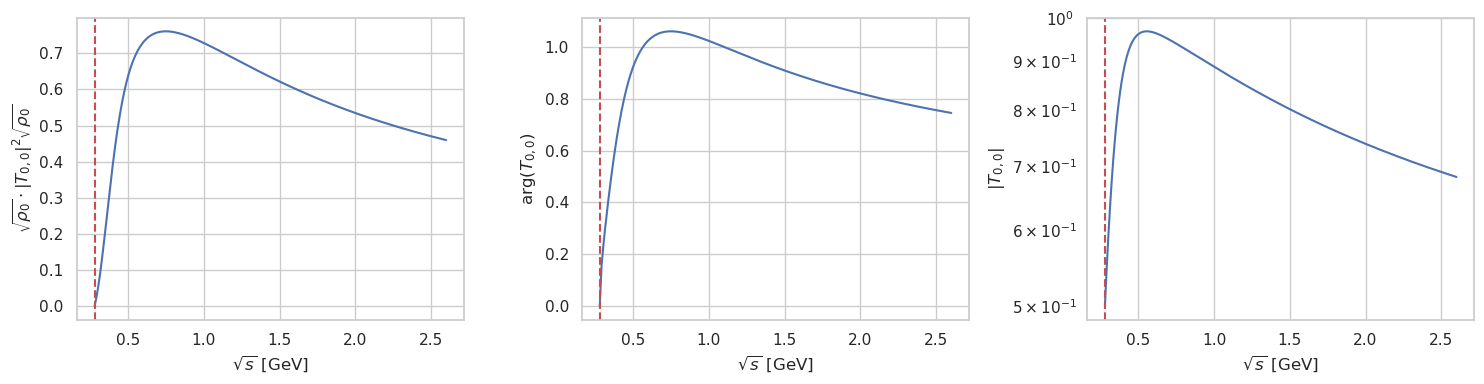

In [72]:
plt.close("all")
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].plot(np.sqrt(np.real(s)), int)
# ax[0].set_yscale("log")
ax[0].set_ylabel(
    rf"$\sqrt{{\rho_{projection[0]}}}\cdot|T_{{{projection[0]},{projection[1]}}}|^2\sqrt{{\rho_{projection[1]}}}$"
)

ax[1].plot(np.sqrt(np.real(s)), phase)
ax[1].set_ylabel(rf"arg($T_{{{projection[0]},{projection[1]}}}$)")

ax[2].plot(np.sqrt(np.real(s)), mag)
ax[2].set_yscale("log")
ax[2].set_ylabel(rf"|$T_{{{projection[0]},{projection[1]}}}$|")

for axis in ax:
    for i, m in enumerate(mC[:, 0]):
        axis.axvline(m + mC[i, 1], color="r", ls="--")
    axis.set_xlabel(r"$\sqrt{s}$ [GeV]")

fig.tight_layout()

if save_fig:
    fig.savefig(
        f"{fig_dir}/{name}_T_mat_{projection[0]}{projection[1]}.png",
        dpi=300,
    )
    fig.savefig(
        f"{fig_dir}/{name}_T_mat_{projection[0]}{projection[1]}.pdf",
        dpi=300,
    )
plt.show()

Complex Energy Plain

Choose branch

In [42]:
# branch = [-1, -1, -1, -1, -1]
# branch = [-1, -1, -1]
branch = [-1]

In [43]:
s_real_min = 0.2**2
s_real_max = 2.2**2
s_real_range = s_real_max - s_real_min

s_imag_min = -1.0
s_imag_max = -1e-10
s_imag_range = s_imag_max - s_imag_min

s_real = np.linspace(s_real_min, s_real_max, 101)
s_imag = np.linspace(s_imag_min, s_imag_max, 101) * 1.0j
s_real, s_imag = np.meshgrid(s_real, s_imag)
s_scan = s_real + s_imag
amp_scan = np.zeros_like(s_scan, dtype=complex)
for i in range(amp_scan.shape[0]):
    for j in range(amp_scan.shape[1]):
        amp_scan[i, j] = T_matrix(
            s_scan[i, j], mR, mC, gR, b_K_mat, R, C, B_K_mat, s0, s_norm, branch
        )[projection[0], projection[1]]

s_imag2 = np.linspace(1e-10, 0.05 * 2, 11) * 1.0j
s_real2, s_imag2 = np.meshgrid(s_real, s_imag2)
s_scan2 = s_real2 + s_imag2
amp_scan2 = np.zeros_like(s_scan2, dtype=complex)
for i in range(amp_scan2.shape[0]):
    for j in range(amp_scan2.shape[1]):
        amp_scan2[i, j] = T_matrix(
            s_scan2[i, j],
            mR,
            mC,
            gR,
            b_K_mat,
            R,
            C,
            B_K_mat,
            s0,
            s_norm,
            np.ones_like(branch),
        )[projection[0], projection[1]]

In [44]:
# Define neighborhood size (e.g., 3 means a 3x3 window)
neighborhood_size = 3

mag = np.abs(amp_scan) ** 2

# Apply maximum filter
max_filtered = maximum_filter(
    mag,
    size=neighborhood_size,
    mode="constant",
)
local_max = mag == max_filtered
maxima_coords = np.argwhere(local_max)
s_pole = s_scan[maxima_coords[:, 0], maxima_coords[:, 1]]
m_pole = np.real(np.sqrt(s_pole))
w_pole = -np.imag(np.sqrt(s_pole))

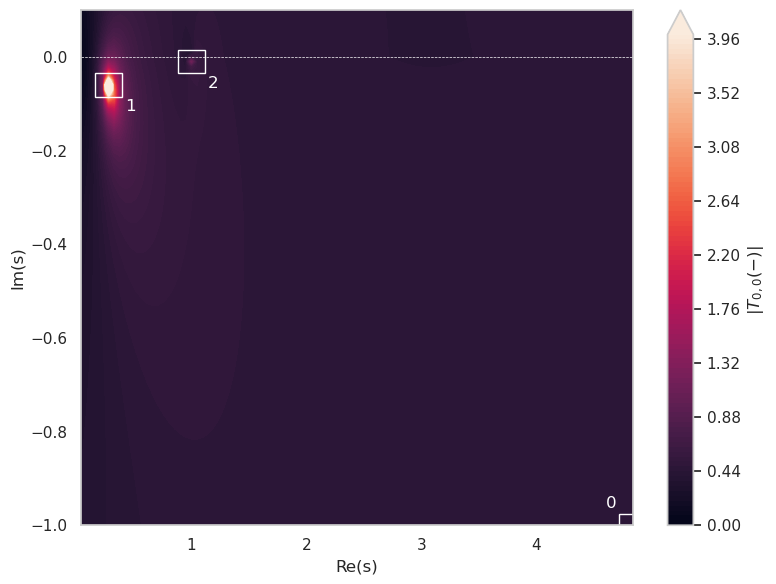

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [45]:
branch_string = ""
for i, b in enumerate(branch):
    if b == 1:
        branch_string += "+"
    elif b == -1:
        branch_string += "-"

levels = np.linspace(0, 4, 101)

plt.close("all")
fig, ax = plt.subplots(figsize=(8, 6))

cont = ax.contourf(
    np.real(s_real),
    np.imag(s_imag),
    np.abs(amp_scan),
    levels=levels,
    extend="max",
)
cont2 = ax.contourf(
    np.real(s_real2),
    np.imag(s_imag2),
    np.abs(amp_scan2),
    levels=levels,
    extend="max",
)

ax.axhline(0, color="white", lw=0.5, ls="--")

for i, s_i in enumerate(s_pole):
    box = mpatches.Rectangle(
        (np.real(s_i) - 0.025 * s_real_range, np.imag(s_i) - 0.025 * s_imag_range),
        0.05 * s_real_range,
        0.05 * s_imag_range,
        ec="white",
        fc="None",
    )
    ax.add_patch(box)
    if np.imag(s_i) <= (s_imag_min + s_imag_range / 2) and np.real(s_i) <= (
        s_real_min + s_real_range / 2
    ):
        ax.text(
            np.real(s_i) + 0.03 * s_real_range,
            np.imag(s_i) + 0.03 * s_imag_range,
            f"{i}",
            fontsize=12,
            color="white",
            ha="left",
            va="top",
        )
    elif np.imag(s_i) <= (s_imag_min + s_imag_range / 2) and np.real(s_i) > (
        s_real_min + s_real_range / 2
    ):
        ax.text(
            np.real(s_i) - 0.03 * s_real_range,
            np.imag(s_i) + 0.03 * s_imag_range,
            f"{i}",
            fontsize=12,
            color="white",
            ha="right",
            va="bottom",
        )
    elif np.imag(s_i) > (s_imag_min + s_imag_range / 2) and np.real(s_i) <= (
        s_real_min + s_real_range / 2
    ):
        ax.text(
            np.real(s_i) + 0.03 * s_real_range,
            np.imag(s_i) - 0.03 * s_imag_range,
            f"{i}",
            fontsize=12,
            color="white",
            ha="left",
            va="top",
        )
    elif np.imag(s_i) > (s_imag_min + s_imag_range / 2) and np.real(s_i) > (
        s_real_min + s_real_range / 2
    ):
        ax.text(
            np.real(s_i) - 0.03 * s_real_range,
            np.imag(s_i) - 0.03 * s_imag_range,
            f"{i}",
            fontsize=12,
            color="white",
            ha="right",
            va="top",
        )
    else:
        print("Error: pole position not found")

ax.set_xlabel("Re(s)")
ax.set_ylabel("Im(s)")
plt.colorbar(cont, label=f"|$T_{{{projection[0]},{projection[1]}}}({branch_string})$|")
plt.tight_layout()

if save_fig:
    plt.savefig(
        f"{fig_dir}/{name}_T_mat_{projection[0]}{projection[1]}_{branch_string}_poles.png",
        dpi=300,
    )
    plt.savefig(
        f"{fig_dir}/{name}_T_mat_{projection[0]}{projection[1]}_{branch_string}_poles.pdf",
        dpi=300,
    )
plt.show()

for i, s_i in enumerate(s_pole):
    display(
        Math(
            rf"""
                 \textbf{{Pole {i}:}} \\
                 \Re(s_\text{{pole}})={np.real(s_i):.2f} \text{{ GeV}}^2 \\
                 \Im(s_\text{{pole}})={np.imag(s_i):.2f} \text{{ GeV}}^2 \\
                 M_\text{{pole}}={np.real(np.sqrt(s_i)) * 1e3:.2f} \text{{ MeV}} \\
                 \Gamma_\text{{pole}}={-np.imag(np.sqrt(s_i)) * 2.0 * 1e3:.2f} \text{{ MeV}} \\
                 """
        )
    )

## F-Vector

$$ F_i^p(s)=\sum_j(I+K(s) C(s))_{i j}^{-1} \cdot P_j^p(s) $$
$$ P_j^p(s)=\sum_\alpha\left(\frac{\beta_{\alpha_p}^p g_{\alpha_j}}{m_\alpha^2 -s}+\sum_k c_{k j} \cdot s^k\right) \cdot B^l\left(q_j, q_{\alpha_j}\right) $$

In [99]:
from utils.dynamics import F_vector

Parameter Values

In [100]:
# beta = np.array(
#     [
#         3.154361451965228e-07,
#         0.7661117244220401,
#         0.7508061641317058,
#         0.1833122437640562,
#         -3.419515724597288e-07,
#     ]
# )
beta = np.array(
    [
        1000.0000000000000000,
        1.000000000000000,
        1.000000000000000,
        1.000000000000000,
    ]
)
# beta = np.array(
#     [
#         0.06207854434441903,
#         1.045601356009003,
#         -0.4121981450535855,
#         0.1325243372668005,
#         -2.043523339774283,
#     ]
# )

# b_P_vec = np.array([[-0.07044337398147765], [0.04140418097435047]])
# b_P_vec = np.array([[1], [1], [1], [1], [1]])
# b_P_vec = np.array([[1], [1]])

Real Energies

In [184]:
mR = np.array(
    [
        0.9,
        1.37,
        1.5,
        1.71,
    ]
)
gR = np.array(
    [
        [
            0.2,
            -0.1,
            0.1,
            0.1,
            0.1,
        ],
        [
            2,
            -2,
            -3,
            1,
            1,
        ],
        [
            0.1,
            0.1,
            0.1,
            0.1,
            0.1,
        ],
    ]
)

s = np.linspace((2 * m_pic) ** 2, 2.2**2, 1000) + 0.0j
amp = np.zeros(len(s), dtype=complex)
phsp = np.zeros(len(s), dtype=complex)
for i, s_val in enumerate(s):
    amp[i] = F_vector(
        s_val, mR, mC, gR, beta, b_K_mat, b_P_vec, R, C, B_K_mat, B_P_vec, s0, s_norm
    )[projection[0]]
    if -np.imag(cm_dudek(s_val, mC[projection[0], 0], mC[projection[0], 1], 1)) < 1e-15:
        phsp[i] = 0.0 + 0.0j
    else:
        phsp[i] = -np.imag(
            cm_dudek(s_val, mC[projection[0], 0], mC[projection[0], 1], 1)
        )

mag = abs(amp)
int = np.abs(amp * np.sqrt(phsp)) ** 2
phase = np.angle(amp)

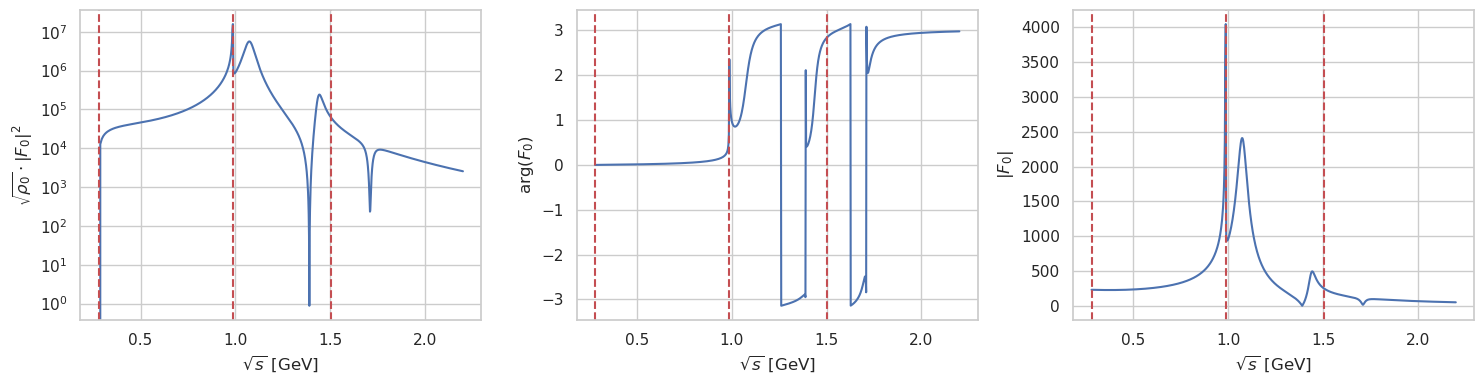

In [185]:
plt.close("all")
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].plot(np.sqrt(np.real(s)), int)
ax[0].set_yscale("log")
ax[0].set_ylabel(rf"$\sqrt{{\rho_{projection[0]}}}\cdot|F_{{{projection[0]}}}|^2$")

ax[1].plot(np.sqrt(np.real(s)), phase)
ax[1].set_ylabel(rf"arg($F_{{{projection[0]}}}$)")

ax[2].plot(np.sqrt(np.real(s)), mag)
# ax[2].set_yscale("log")
ax[2].set_ylabel(rf"|$F_{{{projection[0]}}}$|")

for axis in ax:
    for i, m in enumerate(mC[:, 0]):
        axis.axvline(m + mC[i, 1], color="r", ls="--")
    axis.set_xlabel(r"$\sqrt{s}$ [GeV]")

fig.tight_layout()

if save_fig:
    fig.savefig(
        f"{fig_dir}/{name}_F_vec_{projection[0]}.png",
        dpi=300,
    )
    fig.savefig(
        f"{fig_dir}/{name}_F_vec_{projection[0]}.pdf",
        dpi=300,
    )
plt.show()

Complex Energy Plain

In [40]:
s_real_min = 0.2**2
s_real_max = 2.2**2
s_real_range = s_real_max - s_real_min

s_imag_min = -1.0
s_imag_max = -1e-10
s_imag_range = s_imag_max - s_imag_min

s_real = np.linspace(s_real_min, s_real_max, 101)
s_imag = np.linspace(s_imag_min, s_imag_max, 101) * 1.0j
s_real, s_imag = np.meshgrid(s_real, s_imag)
s_scan = s_real + s_imag
amp_scan = np.zeros_like(s_scan, dtype=complex)
for i in range(amp_scan.shape[0]):
    for j in range(amp_scan.shape[1]):
        amp_scan[i, j] = F_vector(
            s_scan[i, j],
            mR,
            mC,
            gR,
            beta,
            b_K_mat,
            b_P_vec,
            R,
            C,
            B_K_mat,
            B_P_vec,
            s0,
            s_norm,
            branch,
        )[projection[0]]

s_imag2 = np.linspace(0.00, 0.05 * 2, 11) * 1.0j
s_real2, s_imag2 = np.meshgrid(s_real, s_imag2)
s_scan2 = s_real2 + s_imag2
amp_scan2 = np.zeros_like(s_scan2, dtype=complex)
for i in range(amp_scan2.shape[0]):
    for j in range(amp_scan2.shape[1]):
        amp_scan2[i, j] = F_vector(
            s_scan2[i, j],
            mR,
            mC,
            gR,
            beta,
            b_K_mat,
            b_P_vec,
            R,
            C,
            B_K_mat,
            B_P_vec,
            s0,
            s_norm,
            np.ones_like(branch),
        )[projection[0]]

In [41]:
# Define neighborhood size (e.g., 3 means a 3x3 window)
neighborhood_size = 3

mag = np.abs(amp_scan)

# Apply maximum filter
max_filtered = maximum_filter(
    mag,
    size=neighborhood_size,
    mode="constant",
)
local_max = mag == max_filtered
maxima_coords = np.argwhere(local_max)

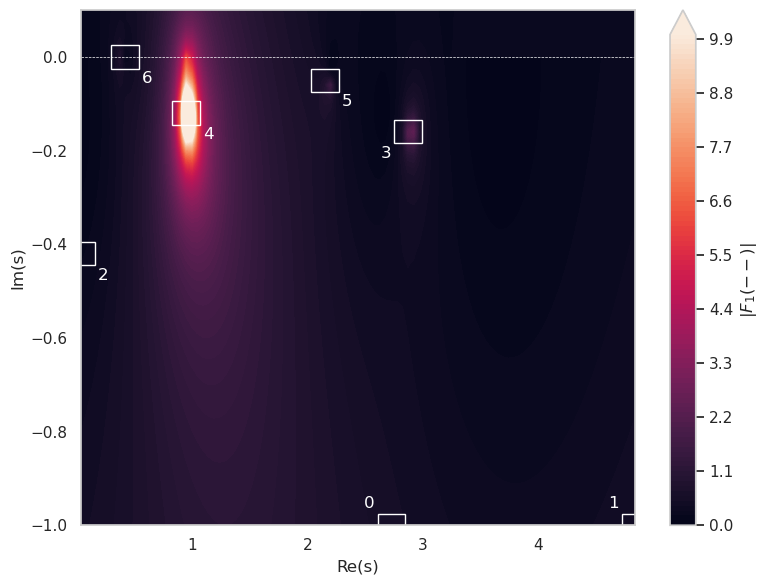

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [42]:
branch_string = ""
for i, b in enumerate(branch):
    if b == 1:
        branch_string += "+"
    elif b == -1:
        branch_string += "-"

levels = np.linspace(0, 10, 101)

plt.close("all")
fig, ax = plt.subplots(figsize=(8, 6))

cont = ax.contourf(
    np.real(s_real),
    np.imag(s_imag),
    np.abs(amp_scan),
    levels=levels,
    extend="max",
)
cont2 = ax.contourf(
    np.real(s_real2),
    np.imag(s_imag2),
    np.abs(amp_scan2),
    levels=levels,
    extend="max",
)

ax.axhline(0, color="white", lw=0.5, ls="--")

for i, s_i in enumerate(s_pole):
    box = mpatches.Rectangle(
        (np.real(s_i) - 0.025 * s_real_range, np.imag(s_i) - 0.025 * s_imag_range),
        0.05 * s_real_range,
        0.05 * s_imag_range,
        ec="white",
        fc="None",
    )
    ax.add_patch(box)
    if np.imag(s_i) <= (s_imag_min + s_imag_range / 2) and np.real(s_i) <= (
        s_real_min + s_real_range / 2
    ):
        ax.text(
            np.real(s_i) + 0.03 * s_real_range,
            np.imag(s_i) + 0.03 * s_imag_range,
            f"{i}",
            fontsize=12,
            color="white",
            ha="left",
            va="top",
        )
    elif np.imag(s_i) <= (s_imag_min + s_imag_range / 2) and np.real(s_i) > (
        s_real_min + s_real_range / 2
    ):
        ax.text(
            np.real(s_i) - 0.03 * s_real_range,
            np.imag(s_i) + 0.03 * s_imag_range,
            f"{i}",
            fontsize=12,
            color="white",
            ha="right",
            va="bottom",
        )
    elif np.imag(s_i) > (s_imag_min + s_imag_range / 2) and np.real(s_i) <= (
        s_real_min + s_real_range / 2
    ):
        ax.text(
            np.real(s_i) + 0.03 * s_real_range,
            np.imag(s_i) - 0.03 * s_imag_range,
            f"{i}",
            fontsize=12,
            color="white",
            ha="left",
            va="top",
        )
    elif np.imag(s_i) > (s_imag_min + s_imag_range / 2) and np.real(s_i) > (
        s_real_min + s_real_range / 2
    ):
        ax.text(
            np.real(s_i) - 0.03 * s_real_range,
            np.imag(s_i) - 0.03 * s_imag_range,
            f"{i}",
            fontsize=12,
            color="white",
            ha="right",
            va="top",
        )
    else:
        print("Error: pole position not found")

ax.set_xlabel("Re(s)")
ax.set_ylabel("Im(s)")
plt.colorbar(cont, label=f"|$F_{{{projection[0]}}}({branch_string})$|")
plt.tight_layout()

if save_fig:
    plt.savefig(
        f"{fig_dir}/F_vec_{projection[0]}_poles.png",
        dpi=300,
    )
    plt.savefig(
        f"{fig_dir}/F_vec_{projection[0]}_poles.pdf",
        dpi=300,
    )
plt.show()

for i, s_i in enumerate(s_pole):
    display(
        Math(
            rf"""
                 \textbf{{Pole {i}:}} \\
                 \Re(s_\text{{pole}})={np.real(s_i):.2f} \text{{ GeV}}^2 \\
                 \Im(s_\text{{pole}})={np.imag(s_i):.2f} \text{{ GeV}}^2 \\
                 M_\text{{pole}}={np.real(np.sqrt(s_i)) * 1e3:.2f} \text{{ MeV}} \\
                 \Gamma_\text{{pole}}={-np.imag(np.sqrt(s_i)) * 2.0 * 1e3:.2f} \text{{ MeV}} \\
                 """
        )
    )